In [1]:
# Imports
import os
import graphviz
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.utils import Sequence
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from city_sustainability.models import unet_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from city_sustainability.quality import life_quality
from tensorflow.keras.applications.vgg16 import VGG16
from city_sustainability.preprocessing import image_resize
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from city_sustainability.loading_data_448x448 import loading_paths_448
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from city_sustainability.loading_data_448x448 import image_and_label_arrays_448
from tensorflow.keras.layers import Conv2D, BatchNormalization, Dropout, MaxPooling2D, UpSampling2D, Concatenate, Input

2023-05-29 10:35:38.297361: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-29 10:35:38.321192: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-29 10:35:38.322551: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-29 10:35:38.752415: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Create the model
model_full = unet_model.build_vgg16_model_full(input_shape=(448, 448, 3), num_classes = 9)

2023-05-29 10:35:43.205922: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-29 10:35:43.206144: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [3]:
# Total params: 26,482,249
# Trainable params: 11,764,617
# Non-trainable params: 14,717,632
model_full.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 448, 448, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 448, 448, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 448, 448, 64  36928       ['block1_conv1[0][0]']           
                                )                                                             

                                                                                                  
 batch_normalization_2 (BatchNo  (None, 112, 112, 25  1024       ['conv2d_2[0][0]']               
 rmalization)                   6)                                                                
                                                                                                  
 dropout_2 (Dropout)            (None, 112, 112, 25  0           ['batch_normalization_2[0][0]']  
                                6)                                                                
                                                                                                  
 up_sampling2d_3 (UpSampling2D)  (None, 224, 224, 25  0          ['dropout_2[0][0]']              
                                6)                                                                
                                                                                                  
 concatena

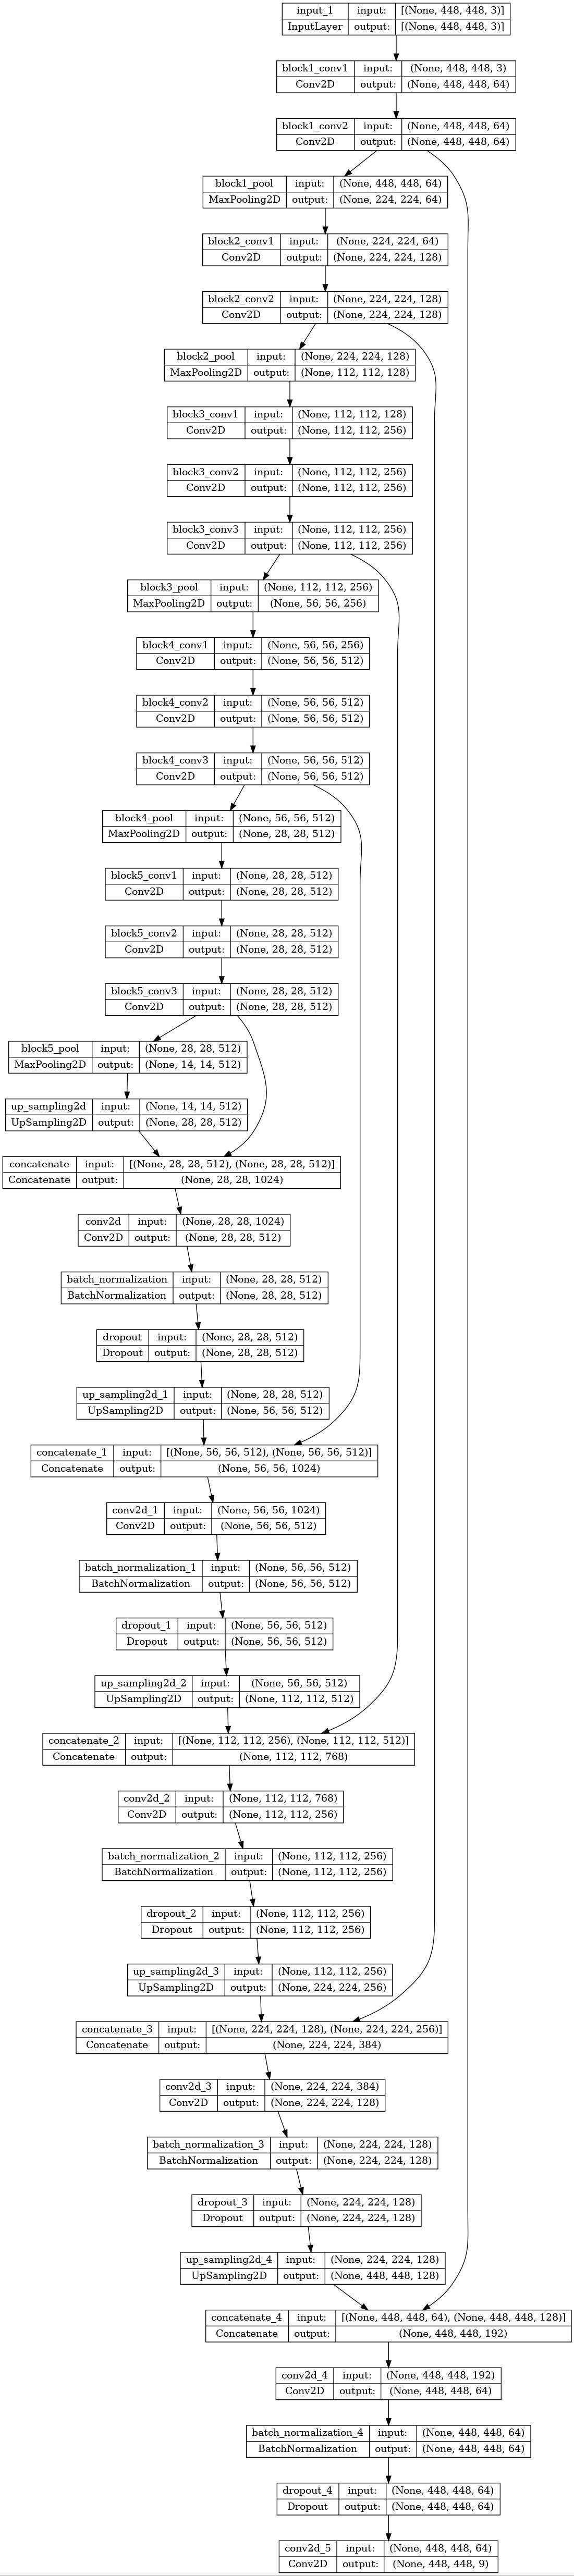

In [10]:
# 0. Installation to generate the plot:
# 1. Excecute pip install graphviz in Jupyter Notebook
# 2. Excecute sudo apt-get update and  sudo apt-get install graphviz in your Ubuntu Terminal
# 3. Save your Jupyter Notebook and Restart your Kernel
# 4. import graphviz
# 5. from keras.utils.vis_utils import plot_model
# 6. Create your CNN model and confirm it by doing model_full.summary()

plot_model(model_full, to_file='VGG16_model_full_diagram.jpg', show_shapes=True, show_layer_names=True)